In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im = plt.imread(r'C:\Users\DeLL\Desktop\ML\CNN\Data\bird.png')

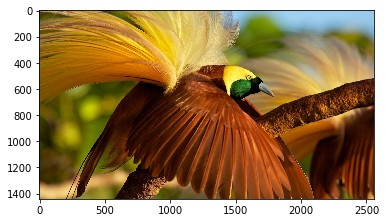

In [3]:
plt.imshow(im)

In [4]:
im.shape

(1440, 2560, 4)

In [5]:
im2 = im[:,:,:3]
im2.shape

(1440, 2560, 3)

In [6]:
R = im2[:,:,0]
G = im2[:,:,1]
B = im2[:,:,2]

In [7]:
R.shape

(1440, 2560)

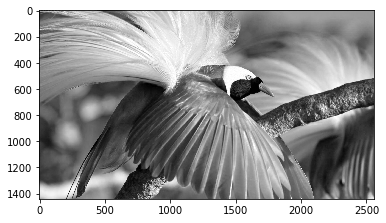

In [8]:
plt.imshow(R,cmap='gray')

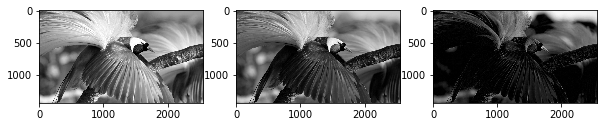

In [10]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,15))
ax1.imshow(R,cmap = 'gray')
ax2.imshow(G,cmap = 'gray')
ax3.imshow(B,cmap = 'gray')

In [11]:
im3 = im2.copy()
im3[:,:,2] = 255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


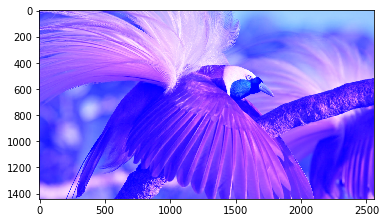

In [12]:
plt.imshow(im3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


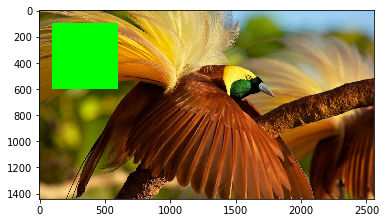

In [17]:
im3 = im2.copy()
im3[100:600,100:600,0] = 0
im3[100:600,100:600,1] = 100
im3[100:600,100:600,2] = 0
plt.imshow(im3)

In [18]:
im = plt.imread(r'C:\Users\DeLL\Desktop\ML\CNN\Data\bird.png')

In [19]:
im2 = im[:,:,:3]

In [20]:
R = im2[:,:,0]
G = im2[:,:,1]
B = im2[:,:,2]

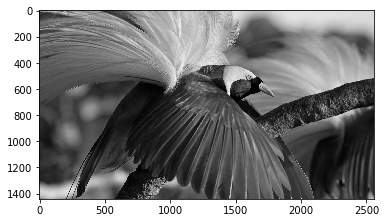

In [21]:
imGray = 0.333*R + 0.333*G + 0.333*B
plt.imshow(imGray,cmap = 'gray')

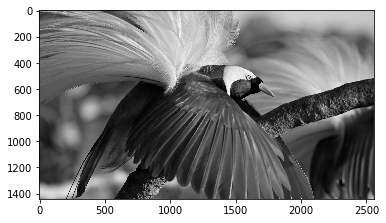

In [22]:
imGray = 0.2989*R + 0.5870*G + 0.1140*B
plt.imshow(imGray,cmap='gray')

In [23]:
import cv2

In [24]:
imGrayCV2 = cv2.cvtColor(im2,cv2.COLOR_RGB2GRAY)

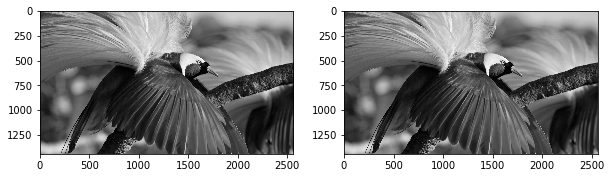

In [25]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imGray,cmap='gray')
ax2.imshow(imGrayCV2,cmap='gray')

# Blurring, Edge, Sharpening

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

In [27]:
im = plt.imread(r'C:\Users\DeLL\Desktop\ML\CNN\Data\bird.png')[:,:,:3]

In [28]:
imGray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)

In [29]:
smoothingMask = np.ones((15,15))/225

In [30]:
imBlurred = signal.convolve2d(imGray,smoothingMask,
                             boundary='symm',mode='same')

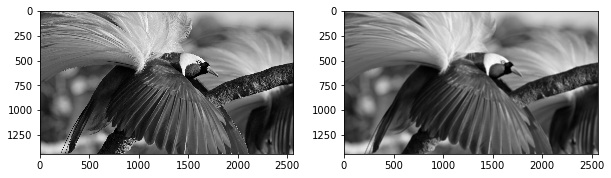

In [31]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imGray,cmap='gray')
ax2.imshow(imBlurred,cmap='gray')

In [32]:
xMask = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
yMask = xMask.T.copy()

In [48]:
fx = signal.convolve2d(imGray,xMask,boundary='symm',mode='same')
fy = signal.convolve2d(imGray,yMask,boundary='symm',mode='same')

In [34]:
fx.shape

(1440, 2560)

In [35]:
imGray.shape

(1440, 2560)

In [49]:
Gm = (fx**2 + fy**2)**0.5

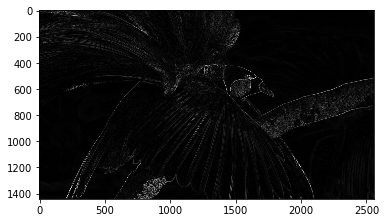

In [37]:
plt.imshow(Gm,cmap = 'gray')

In [40]:
th = Gm.max()-4*Gm.std()

In [41]:
th

1.5983811700677228

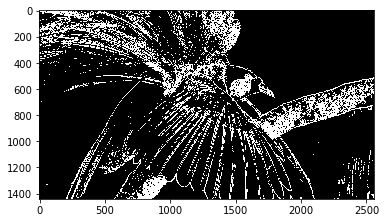

In [45]:
E = Gm>th
plt.imshow(Gm>0.1,cmap = 'gray')

In [52]:
imSharped = imBlurred + 0.5*Gm

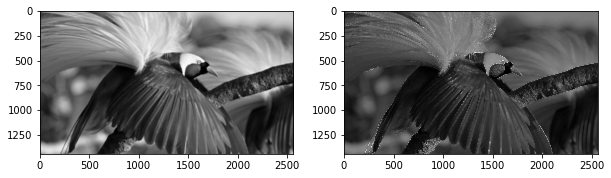

In [53]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imBlurred,cmap='gray')
ax2.imshow(imSharped,cmap = 'gray')